# `special`

In this module, general functions are presented which do not fall under a same category.

In [20]:
import dsptoolbox as dsp
from os.path import join

### Waterfall plot

(<Figure size 1000x800 with 1 Axes>,
 <Axes3DSubplot: xlabel='Time / s', ylabel='Frequency / Hz', zlabel='dBFS (normalized @ peak)'>)

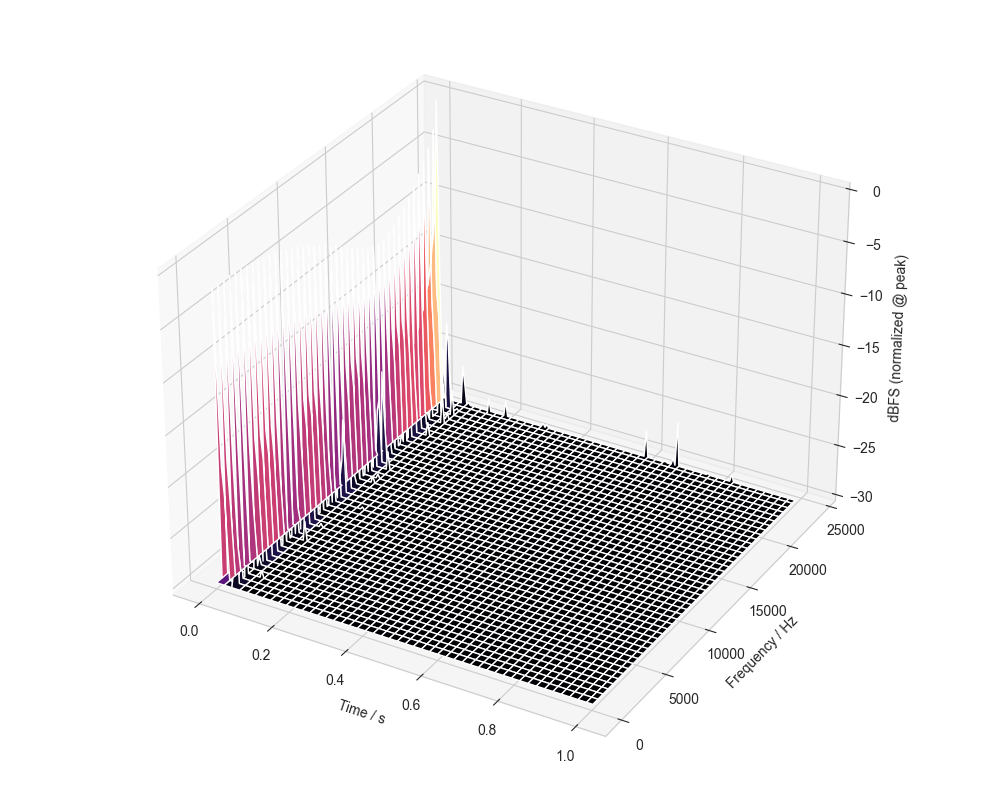

In [21]:
rir = dsp.Signal(join('data', 'rir.wav'), signal_type='rir')
rir.set_spectrogram_parameters(window_length_samples=256, overlap_percent=0,
                               window_type='boxcar')
dsp.special.plot_waterfall(rir, dynamic_range_db=30)

### Cepstrum

(0.0, 0.05)

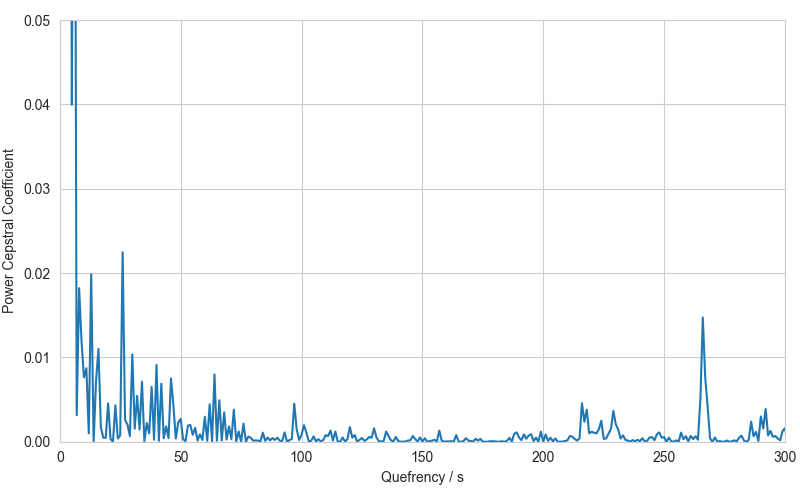

In [22]:
speech = dsp.Signal(join('data', 'speech.flac'))
cp = dsp.special.cepstrum(speech, mode='power')
fig, ax = dsp.plots.general_plot(
    range(len(cp)), cp, xlabel='Quefrency / s',
    ylabel='Power Cepstral Coefficient', log=False, returns=True)
ax.set_xlim([0, 300])
ax.set_ylim([0, 5e-2])

### MFCC
The mel-frequency cepstral coefficients is an audio feature used in speech recognition systems and certain Machine Learning applications.

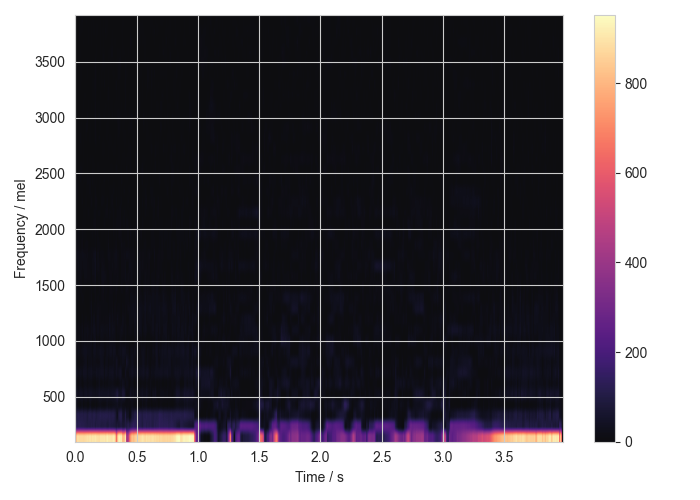

In [23]:
dsp.special.mfcc(speech);

### Log-mel Spectrogram
This function turns the axis of a spectrogram from Hz to Mel bands

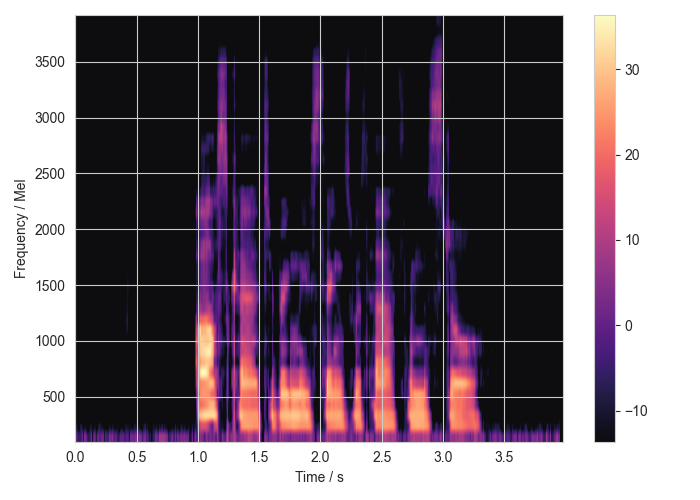

In [25]:
dsp.special.log_mel_spectrogram(speech);